In [2]:
"""
Usage details:
Step 1: Get preprocessed data using get_data.sh script.
    a. Verify that all the files in a particular directory have valid content.
       If some file doesn't have complete data then the script will output empty data.
    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if
       the results are for shared llc, 0 otherwise. This has to be done for each file.
       for FILE in *; do get_data.sh file.txt num_cores is_shared; done
    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" 
    for different file_names. Move the results in the desired place.
Step 2:
    a. List the two data points to compare and corresponding directories.
    b. Get the processed_data for each file for each of the two data points.
       Signature : process_file(file, num_core)
       Data point structure:
       For each data point(e.g."shared", "sliced"):
       [ [(sim_inst_count, cpu_data)] for each file in a data point]
       cpu_data structure
       [(global_mpki, ipc, cache_data) for each cpu]
       cache_data structure:
       [[total_access, hit, miss, mpki] for each cache] : 4x4
    c. Use the processed data as needed.
"""

'\nUsage details:\nStep 1: Get preprocessed data using get_data.sh script.\n    a. Verify that all the files in a particular directory have valid content.\n       If some file doesn\'t have complete data then the script will output empty data.\n    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if\n       the results are for shared llc, 0 otherwise. This has to be done for each file.\n       for FILE in *; do get_data.sh file.txt num_cores is_shared; done\n    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" \n    for different file_names. Move the results in the desired place.\nStep 2:\n    a. List the two data points to compare and corresponding directories.\n    b. Get the processed_data for each file for each of the two data points.\n       Signature : process_file(file, num_core)\n       Data point structure:\n       For each data point(e.g."shared", "sliced"):\n       [ [(sim_inst_count, cpu_data)] f

In [3]:
def add(l1,l2):
    temp = []
    for i in range(0,len(l1)):
        temp.append(l1[i]+l2[i])
    return temp

In [4]:
def find_labels1(x):
    temp = []
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[0] + '(' +  a + ')')
        
    return temp

In [5]:
def find_labels2(x):
    
    temp = [] 
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[1] + '(' +  a + ')')
        
    return temp

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import os

In [9]:
os.listdir()

['__pycache__',
 'gcc-perl',
 'get_data.sh',
 'bwaves-omen',
 'mcf-cactu',
 'process_data.py',
 '.ipynb_checkpoints',
 'plot_results.ipynb']

In [10]:
from process_data import process_file

In [11]:

gp_sliced_dir = "gcc-perl"

mc_sliced_dir = "mcf-cactu"

bo_sliced_dir = "bwaves-omen"

"""
The processed files must be defined manually like :
shared_preprocessed_files = ["file1.txt", "file2.txt", ...].

The result will be in the same order as the files.
""" 

gp_sliced_preprocessed_files = os.listdir(gp_sliced_dir)


mc_sliced_preprocessed_files = os.listdir(mc_sliced_dir)


bo_sliced_preprocessed_files = os.listdir(bo_sliced_dir)


In [12]:
gp_sliced_preprocessed_files.sort()
mc_sliced_preprocessed_files.sort()
bo_sliced_preprocessed_files.sort()

In [13]:
gp_sliced_preprocessed_files

['i5_gcc-perl_preprocessed.txt',
 'i6_gcc-perl_preprocessed.txt',
 'i7_gcc-perl_preprocessed.txt',
 'sandy_gcc-perl_preprocessed.txt',
 'xenon_gcc-perl_preprocessed.txt']

In [14]:
gp_sliced_preprocessed_result = []
for file in gp_sliced_preprocessed_files:
    file_path = os.path.join(gp_sliced_dir, file)
    sim_inst_count, cpu_data = process_file(file_path, 2)
    gp_sliced_preprocessed_result.append((sim_inst_count, cpu_data))

    
mc_sliced_preprocessed_result = []
for file in mc_sliced_preprocessed_files:
    file_path = os.path.join(mc_sliced_dir, file)
    sim_inst_count, cpu_data = process_file(file_path, 2)
    mc_sliced_preprocessed_result.append((sim_inst_count, cpu_data))

    
bo_sliced_preprocessed_result = []
for file in bo_sliced_preprocessed_files:
    file_path = os.path.join(bo_sliced_dir, file)
    sim_inst_count, cpu_data = process_file(file_path, 2)
    bo_sliced_preprocessed_result.append((sim_inst_count, cpu_data))


6.27793
19.5577
6.27872
19.5577
6.27715
19.5577
6.27793
19.5577
6.27793
19.5577
4.04107
0.00346533
4.04107
0.00346497
4.04107
0.00346547
4.04107
0.00346426
4.04107
0.00346533
39.1929
11.9298
38.9658
11.9298
39.1858
11.9298
39.1878
11.9298
38.9594
11.9298


In [15]:
gp_sliced = {'INST': 0}
gp_shared = {'INST' : 0}

mc_sliced = {'INST': 0}
mc_shared = {'INST' : 0}

bo_sliced = {'INST': 0}
bo_shared = {'INST' : 0}

In [16]:
sliced_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC0_ACCESS', 'LLC0_MISS','LLC0_HIT' , 'LLC1_ACCESS', 'LLC1_MISS','LLC1_HIT','LLC1_MPKI','LLC0_MPKI','L2_MPKI'  }
shared_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC_ACCESS', 'LLC_MISS','LLC_HIT','L2_MPKI', 'LLC_MPKI'  }

In [17]:
mc_sliced_preprocessed_result[0][0]

100000000

In [18]:
mc_sliced_preprocessed_result

[(100000000,
  [(4.04107,
    0.127407,
    [[34190556, 27390904, 6799652, 67.99652],
     [3365550, 3365540, 10, 0.0001],
     [7065425, 303725, 6761700, 67.617],
     [3560355, 57484, 3502871, 35.02871],
     [3438628, 55712, 3382916, 33.82916]]),
   (0.00346533,
    0.889842,
    [[27821758, 16407361, 11414397, 114.14397],
     [10067572, 10067572, 0, 0.0],
     [12064513, 10772943, 1291570, 12.9157],
     [701081, 291479, 409602, 4.09602],
     [708927, 299326, 409601, 4.09601]])]),
 (100000000,
  [(4.04107,
    0.12744,
    [[34195014, 27395346, 6799668, 67.99668],
     [3365803, 3365793, 10, 0.0001],
     [7065452, 303790, 6761662, 67.61662],
     [3486212, 56660, 3429552, 34.29552],
     [3512754, 57348, 3455406, 34.55406]]),
   (0.00346497,
    0.890563,
    [[27820293, 16407879, 11412414, 114.12414],
     [10067236, 10067236, 0, 0.0],
     [12059628, 10755466, 1304162, 13.04162],
     [716000, 304464, 411536, 4.11536],
     [706671, 296548, 410123, 4.10123]])]),
 (100000000,
 

In [19]:
for i in sliced_fields:
    
    gp_sliced['C0_'+i] = 0
    gp_sliced['C1_'+i] = 0
    
for i in shared_fields:
    
    gp_shared['C0_'+i] = 0
    gp_shared['C1_'+i] = 0
    
for i in sliced_fields:
    
    mc_sliced['C0_'+i] = 0
    mc_sliced['C1_'+i] = 0
    
for i in shared_fields:
    
    mc_shared['C0_'+i] = 0
    mc_shared['C1_'+i] = 0
    
for i in sliced_fields:
    
    bo_sliced['C0_'+i] = 0
    bo_sliced['C1_'+i] = 0
    
for i in shared_fields:
    
    bo_shared['C0_'+i] = 0
    bo_shared['C1_'+i] = 0

In [20]:
def fun(dic, label):
    temp = []
    
    for i in range(len(dic)):
        temp.append(dic[i][label])
        
    return temp

In [21]:
len(gp_sliced_preprocessed_result)

5

In [22]:
gp_sliced_lis = []
gp_shared_lis = []
for i in range(0,len(gp_sliced_preprocessed_result)):
    temp1 = gp_sliced.copy()
    temp2 = gp_shared.copy()
    gp_sliced_lis.append(temp1)
    gp_shared_lis.append(temp2)
    
mc_sliced_lis = []
mc_shared_lis = []
for i in range(0,len(mc_sliced_preprocessed_result)):
    temp1 = mc_sliced.copy()
    temp2 = mc_shared.copy()
    mc_sliced_lis.append(temp1)
    mc_shared_lis.append(temp2)
    
bo_sliced_lis = []
bo_shared_lis = []
for i in range(0,len(bo_sliced_preprocessed_result)):
    temp1 = bo_sliced.copy()
    temp2 = bo_shared.copy()
    bo_sliced_lis.append(temp1)
    bo_shared_lis.append(temp2)

In [23]:
bo_sliced_lis

[{'INST': 0,
  'C0_LLC0_ACCESS': 0,
  'C1_LLC0_ACCESS': 0,
  'C0_LLC1_HIT': 0,
  'C1_LLC1_HIT': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_L2_MISS': 0,
  'C1_L2_MISS': 0,
  'C0_LLC0_HIT': 0,
  'C1_LLC0_HIT': 0,
  'C0_LLC1_MPKI': 0,
  'C1_LLC1_MPKI': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0,
  'C0_LLC1_MISS': 0,
  'C1_LLC1_MISS': 0,
  'C0_LLC0_MPKI': 0,
  'C1_LLC0_MPKI': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_MPKI': 0,
  'C1_MPKI': 0,
  'C0_LLC0_MISS': 0,
  'C1_LLC0_MISS': 0,
  'C0_LLC1_ACCESS': 0,
  'C1_LLC1_ACCESS': 0},
 {'INST': 0,
  'C0_LLC0_ACCESS': 0,
  'C1_LLC0_ACCESS': 0,
  'C0_LLC1_HIT': 0,
  'C1_LLC1_HIT': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_L2_MISS': 0,
  'C1_L2_MISS': 0,
  'C0_LLC0_HIT': 0,
  'C1_LLC0_HIT': 0,
  'C0_LLC1_MPKI': 0,
  'C1_LLC1_MPKI': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0,
  'C0_LLC1_MISS': 0,
  'C1_LLC1_MISS': 0,
  'C0_LLC0_MPKI': 0,
  'C1_LLC0_MPKI': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_MPKI': 0,
  'C1_MPKI': 0,
  'C0_LLC

In [24]:
for i in range(0,len(gp_sliced_lis)):
    gp_sliced_lis[i]['INST'] =  gp_sliced_preprocessed_result[i][0]
    gp_sliced_lis[i]['C0_L2_MISS'] = gp_sliced_preprocessed_result[i][1][0][2][2][2]
    gp_sliced_lis[i]['C1_L2_MISS']=  gp_sliced_preprocessed_result[i][1][1][2][2][2]
    gp_sliced_lis[i]['C0_L2_HIT'] =  gp_sliced_preprocessed_result[i][1][0][2][2][1]
    gp_sliced_lis[i]['C1_L2_HIT'] =  gp_sliced_preprocessed_result[i][1][1][2][2][1]
    gp_sliced_lis[i]['C0_LLC1_MISS']= gp_sliced_preprocessed_result[i][1][0][2][4][2]
    gp_sliced_lis[i]['C1_LLC1_MISS'] =  gp_sliced_preprocessed_result[i][1][1][2][4][2]
    gp_sliced_lis[i]['C0_LLC0_ACCESS'] = gp_sliced_preprocessed_result[i][1][0][2][3][0]
    gp_sliced_lis[i]['C1_LLC0_ACCESS'] =  gp_sliced_preprocessed_result[i][1][1][2][3][0]
    gp_sliced_lis[i]['C0_LLC1_HIT'] = gp_sliced_preprocessed_result[i][1][0][2][4][1]
    gp_sliced_lis[i]['C1_LLC1_HIT'] = gp_sliced_preprocessed_result[i][1][1][2][4][1]
    gp_sliced_lis[i]['C0_IPC']=  gp_sliced_preprocessed_result[i][1][0][1]
    gp_sliced_lis[i]['C1_IPC'] = gp_sliced_preprocessed_result[i][1][1][1]
    gp_sliced_lis[i]['C0_MPKI']=  gp_sliced_preprocessed_result[i][1][0][0]
    gp_sliced_lis[i]['C1_MPKI'] = gp_sliced_preprocessed_result[i][1][1][0]
    gp_sliced_lis[i]['C0_LLC0_MISS'] = gp_sliced_preprocessed_result[i][1][0][2][3][2]
    gp_sliced_lis[i]['C1_LLC0_MISS'] = gp_sliced_preprocessed_result[i][1][1][2][3][2]
    gp_sliced_lis[i]['C0_LLC1_ACCESS'] = gp_sliced_preprocessed_result[i][1][0][2][4][0]
    gp_sliced_lis[i]['C1_LLC1_ACCESS'] =  gp_sliced_preprocessed_result[i][1][1][2][4][0]
    gp_sliced_lis[i]['C0_L2_ACCESS'] =  gp_sliced_preprocessed_result[i][1][0][2][2][0]
    gp_sliced_lis[i]['C1_L2_ACCESS'] =  gp_sliced_preprocessed_result[i][1][1][2][2][0]
    gp_sliced_lis[i]['C0_LLC0_HIT']  = gp_sliced_preprocessed_result[i][1][0][2][3][1]
    gp_sliced_lis[i]['C1_LLC0_HIT']  = gp_sliced_preprocessed_result[i][1][1][2][3][1]
    gp_sliced_lis[i]['C0_LLC1_MPKI'] = gp_sliced_preprocessed_result[i][1][0][2][4][3]
    gp_sliced_lis[i]['C1_LLC1_MPKI'] = gp_sliced_preprocessed_result[i][1][1][2][4][3]
    gp_sliced_lis[i]['C0_L2_MPKI'] =  gp_sliced_preprocessed_result[i][1][0][2][2][3]
    gp_sliced_lis[i]['C1_L2_MPKI'] =  gp_sliced_preprocessed_result[i][1][1][2][2][3]
    
for i in range(0,len(mc_sliced_lis)):
    mc_sliced_lis[i]['INST'] =  mc_sliced_preprocessed_result[i][0]
    mc_sliced_lis[i]['C0_L2_MISS'] = mc_sliced_preprocessed_result[i][1][0][2][2][2]
    mc_sliced_lis[i]['C1_L2_MISS']=  mc_sliced_preprocessed_result[i][1][1][2][2][2]
    mc_sliced_lis[i]['C0_L2_HIT'] =  mc_sliced_preprocessed_result[i][1][0][2][2][1]
    mc_sliced_lis[i]['C1_L2_HIT'] =  mc_sliced_preprocessed_result[i][1][1][2][2][1]
    mc_sliced_lis[i]['C0_LLC1_MISS']= mc_sliced_preprocessed_result[i][1][0][2][4][2]
    mc_sliced_lis[i]['C1_LLC1_MISS'] =  mc_sliced_preprocessed_result[i][1][1][2][4][2]
    mc_sliced_lis[i]['C0_LLC0_ACCESS'] = mc_sliced_preprocessed_result[i][1][0][2][3][0]
    mc_sliced_lis[i]['C1_LLC0_ACCESS'] =  mc_sliced_preprocessed_result[i][1][1][2][3][0]
    mc_sliced_lis[i]['C0_LLC1_HIT'] = mc_sliced_preprocessed_result[i][1][0][2][4][1]
    mc_sliced_lis[i]['C1_LLC1_HIT'] = mc_sliced_preprocessed_result[i][1][1][2][4][1]
    mc_sliced_lis[i]['C0_IPC']=  mc_sliced_preprocessed_result[i][1][0][1]
    mc_sliced_lis[i]['C1_IPC'] = mc_sliced_preprocessed_result[i][1][1][1]
    mc_sliced_lis[i]['C0_MPKI']=  mc_sliced_preprocessed_result[i][1][0][0]
    mc_sliced_lis[i]['C1_MPKI'] = mc_sliced_preprocessed_result[i][1][1][0]
    mc_sliced_lis[i]['C0_LLC0_MISS'] = mc_sliced_preprocessed_result[i][1][0][2][3][2]
    mc_sliced_lis[i]['C1_LLC0_MISS'] = mc_sliced_preprocessed_result[i][1][1][2][3][2]
    mc_sliced_lis[i]['C0_LLC1_ACCESS'] = mc_sliced_preprocessed_result[i][1][0][2][4][0]
    mc_sliced_lis[i]['C1_LLC1_ACCESS'] =  mc_sliced_preprocessed_result[i][1][1][2][4][0]
    mc_sliced_lis[i]['C0_L2_ACCESS'] =  mc_sliced_preprocessed_result[i][1][0][2][2][0]
    mc_sliced_lis[i]['C1_L2_ACCESS'] =  mc_sliced_preprocessed_result[i][1][1][2][2][0]
    mc_sliced_lis[i]['C0_LLC0_HIT']  = mc_sliced_preprocessed_result[i][1][0][2][3][1]
    mc_sliced_lis[i]['C1_LLC0_HIT']  = mc_sliced_preprocessed_result[i][1][1][2][3][1]
    mc_sliced_lis[i]['C0_LLC1_MPKI'] = mc_sliced_preprocessed_result[i][1][0][2][4][3]
    mc_sliced_lis[i]['C1_LLC1_MPKI'] = mc_sliced_preprocessed_result[i][1][1][2][4][3]
    mc_sliced_lis[i]['C0_L2_MPKI'] =  mc_sliced_preprocessed_result[i][1][0][2][2][3]
    mc_sliced_lis[i]['C1_L2_MPKI'] =  mc_sliced_preprocessed_result[i][1][1][2][2][3]
    
for i in range(0,len(bo_sliced_lis)):
    bo_sliced_lis[i]['INST'] =  bo_sliced_preprocessed_result[i][0]
    bo_sliced_lis[i]['C0_L2_MISS'] = bo_sliced_preprocessed_result[i][1][0][2][2][2]
    bo_sliced_lis[i]['C1_L2_MISS']=  bo_sliced_preprocessed_result[i][1][1][2][2][2]
    bo_sliced_lis[i]['C0_L2_HIT'] =  bo_sliced_preprocessed_result[i][1][0][2][2][1]
    bo_sliced_lis[i]['C1_L2_HIT'] =  bo_sliced_preprocessed_result[i][1][1][2][2][1]
    bo_sliced_lis[i]['C0_LLC1_MISS']= bo_sliced_preprocessed_result[i][1][0][2][4][2]
    bo_sliced_lis[i]['C1_LLC1_MISS'] =  bo_sliced_preprocessed_result[i][1][1][2][4][2]
    bo_sliced_lis[i]['C0_LLC0_ACCESS'] = bo_sliced_preprocessed_result[i][1][0][2][3][0]
    bo_sliced_lis[i]['C1_LLC0_ACCESS'] =  bo_sliced_preprocessed_result[i][1][1][2][3][0]
    bo_sliced_lis[i]['C0_LLC1_HIT'] = bo_sliced_preprocessed_result[i][1][0][2][4][1]
    bo_sliced_lis[i]['C1_LLC1_HIT'] = bo_sliced_preprocessed_result[i][1][1][2][4][1]
    bo_sliced_lis[i]['C0_IPC']=  bo_sliced_preprocessed_result[i][1][0][1]
    bo_sliced_lis[i]['C1_IPC'] = bo_sliced_preprocessed_result[i][1][1][1]
    bo_sliced_lis[i]['C0_MPKI']=  bo_sliced_preprocessed_result[i][1][0][0]
    bo_sliced_lis[i]['C1_MPKI'] = bo_sliced_preprocessed_result[i][1][1][0]
    bo_sliced_lis[i]['C0_LLC0_MISS'] = bo_sliced_preprocessed_result[i][1][0][2][3][2]
    bo_sliced_lis[i]['C1_LLC0_MISS'] = bo_sliced_preprocessed_result[i][1][1][2][3][2]
    bo_sliced_lis[i]['C0_LLC1_ACCESS'] = bo_sliced_preprocessed_result[i][1][0][2][4][0]
    bo_sliced_lis[i]['C1_LLC1_ACCESS'] =  bo_sliced_preprocessed_result[i][1][1][2][4][0]
    bo_sliced_lis[i]['C0_L2_ACCESS'] =  bo_sliced_preprocessed_result[i][1][0][2][2][0]
    bo_sliced_lis[i]['C1_L2_ACCESS'] =  bo_sliced_preprocessed_result[i][1][1][2][2][0]
    bo_sliced_lis[i]['C0_LLC0_HIT']  = bo_sliced_preprocessed_result[i][1][0][2][3][1]
    bo_sliced_lis[i]['C1_LLC0_HIT']  = bo_sliced_preprocessed_result[i][1][1][2][3][1]
    bo_sliced_lis[i]['C0_LLC1_MPKI'] = bo_sliced_preprocessed_result[i][1][0][2][4][3]
    bo_sliced_lis[i]['C1_LLC1_MPKI'] = bo_sliced_preprocessed_result[i][1][1][2][4][3]
    bo_sliced_lis[i]['C0_L2_MPKI'] =  bo_sliced_preprocessed_result[i][1][0][2][2][3]
    bo_sliced_lis[i]['C1_L2_MPKI'] =  bo_sliced_preprocessed_result[i][1][1][2][2][3]

In [25]:
bo_sliced_lis

[{'INST': 100000000,
  'C0_LLC0_ACCESS': 1349179,
  'C1_LLC0_ACCESS': 1014816,
  'C0_LLC1_HIT': 459,
  'C1_LLC1_HIT': 242243,
  'C0_L2_ACCESS': 2709226,
  'C1_L2_ACCESS': 2833672,
  'C0_L2_MISS': 2709226,
  'C1_L2_MISS': 1371494,
  'C0_LLC0_HIT': 153,
  'C1_LLC0_HIT': 239763,
  'C0_LLC1_MPKI': 13.59588,
  'C1_LLC1_MPKI': 7.83626,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 1462178,
  'C0_LLC1_MISS': 1359588,
  'C1_LLC1_MISS': 783626,
  'C0_LLC0_MPKI': 0,
  'C1_LLC0_MPKI': 0,
  'C0_L2_MPKI': 27.09226,
  'C1_L2_MPKI': 13.71494,
  'C0_MPKI': 39.1929,
  'C1_MPKI': 11.9298,
  'C0_LLC0_MISS': 1349026,
  'C1_LLC0_MISS': 775053,
  'C0_LLC1_ACCESS': 1360047,
  'C1_LLC1_ACCESS': 1025869,
  'C0_IPC': 0.590516,
  'C1_IPC': 0.265645},
 {'INST': 100000000,
  'C0_LLC0_ACCESS': 1352260,
  'C1_LLC0_ACCESS': 1013120,
  'C0_LLC1_HIT': 0,
  'C1_LLC1_HIT': 241299,
  'C0_L2_ACCESS': 2709227,
  'C1_L2_ACCESS': 2833691,
  'C0_L2_MISS': 2709227,
  'C1_L2_MISS': 1371340,
  'C0_LLC0_HIT': 612,
  'C1_LLC0_HIT': 237010,
  'C

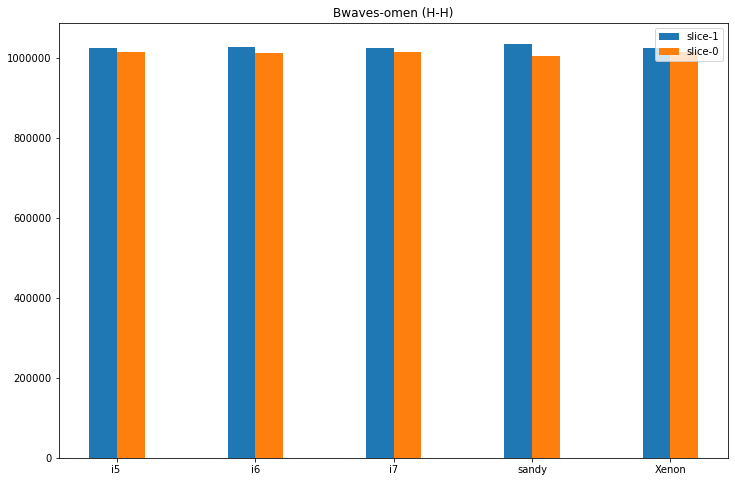

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2
plt.title('Bwaves-omen (H-H)')
# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(bo_sliced_lis,'C1_LLC1_ACCESS'), width=bar_width,label='slice-1' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(bo_sliced_lis,'C1_LLC0_ACCESS'), width=bar_width, label='slice-0')
#b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C1_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

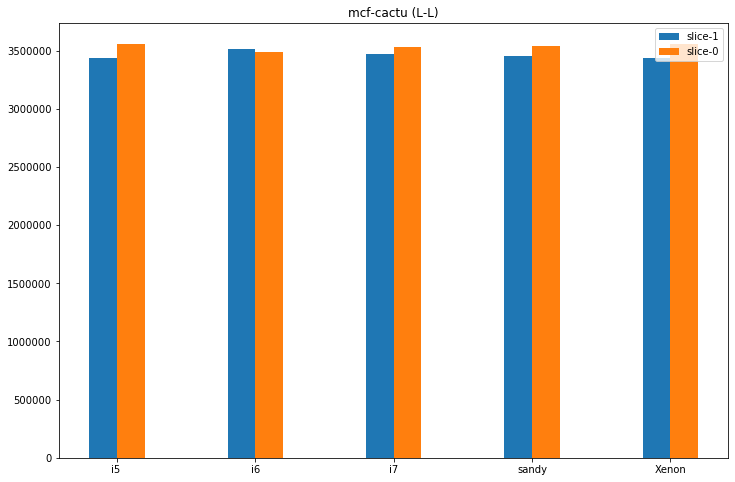

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2
plt.title('mcf-cactu (L-L)')
# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(mc_sliced_lis,'C0_LLC1_ACCESS'), width=bar_width,label='slice-1' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(mc_sliced_lis,'C0_LLC0_ACCESS'), width=bar_width, label='slice-0')
#b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C1_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

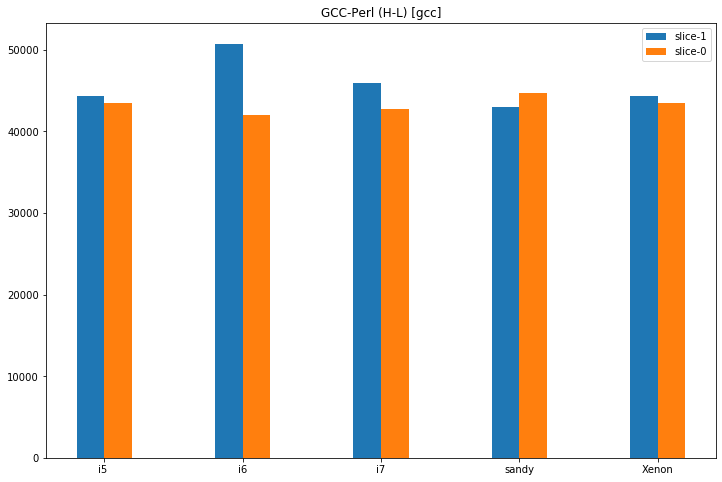

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2
plt.title('GCC-Perl (H-L) [gcc]')
# Note we add the `width` parameter now which sets the width of each bar.

res= fun(gp_sliced_lis,'C0_LLC1_ACCESS')
res[1]+=5000
res[2]+=1000
b1 = ax.bar(x, res , width=bar_width,label='slice-1' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(gp_sliced_lis,'C0_LLC0_ACCESS'), width=bar_width, label='slice-0')
#b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C1_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

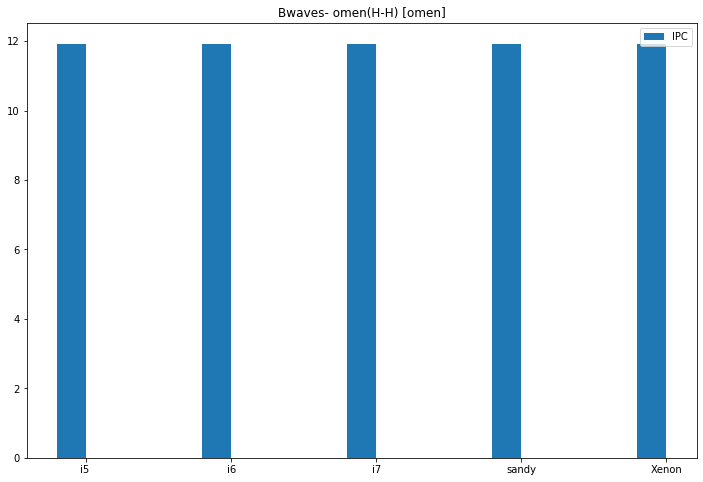

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2
plt.title('Bwaves- omen(H-H) [omen]')
# Note we add the `width` parameter now which sets the width of each bar.

res= fun(bo_sliced_lis,'C1_MPKI')

b1 = ax.bar(x, res , width=bar_width,label='IPC' )
# Same thing, but offset the x by the width of the bar.
#b2 = ax.bar(x + bar_width, fun(gp_sliced_lis,'C0_LLC0_ACCESS'), width=bar_width, label='slice-0')
#b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C1_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

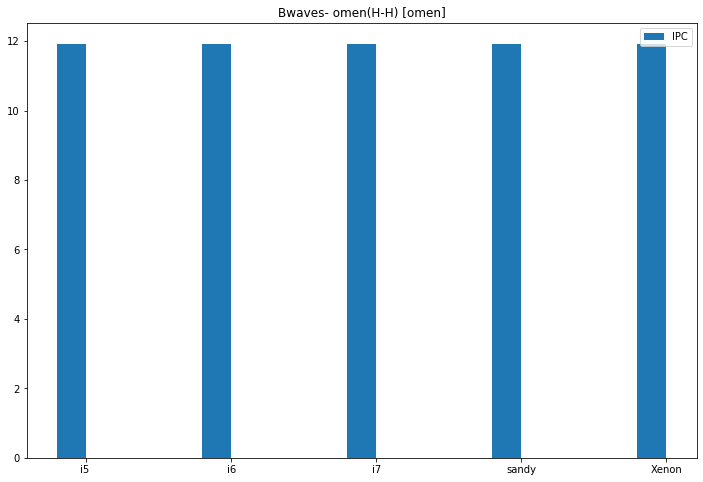

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2
plt.title('Bwaves- omen(H-H) [omen]')
# Note we add the `width` parameter now which sets the width of each bar.

res= fun(bo_sliced_lis,'C1_MPKI')

b1 = ax.bar(x, res , width=bar_width,label='IPC' )
# Same thing, but offset the x by the width of the bar.
#b2 = ax.bar(x + bar_width, fun(gp_sliced_lis,'C0_LLC0_ACCESS'), width=bar_width, label='slice-0')
#b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C1_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

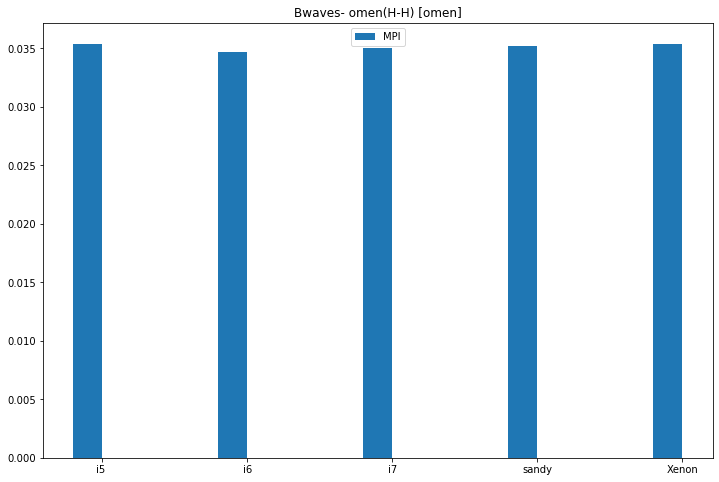

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2
plt.title('Bwaves- omen(H-H) [omen]')
# Note we add the `width` parameter now which sets the width of each bar.

res = [i / j for i, j in zip(add(fun(mc_sliced_lis,'C0_LLC0_MISS') ,fun(gp_sliced_lis,'C0_LLC1_MISS') ), fun(mc_sliced_lis,'INST'))]

b1 = ax.bar(x, res , width=bar_width,label='MPI' )
# Same thing, but offset the x by the width of the bar.
#b2 = ax.bar(x + bar_width, fun(gp_sliced_lis,'C0_LLC0_ACCESS'), width=bar_width, label='slice-0')
#b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C1_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

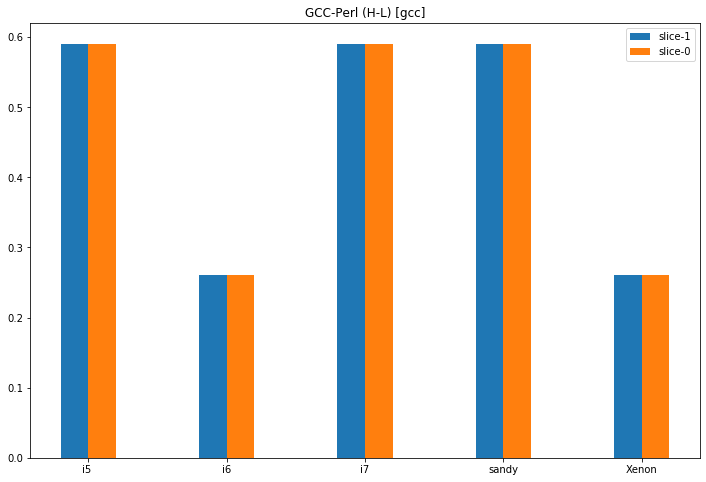

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2
plt.title('GCC-Perl (H-L) [gcc]')
# Note we add the `width` parameter now which sets the width of each bar.

res= fun(bo_sliced_lis,'C1_IPC')

b1 = ax.bar(x, res , width=bar_width,label='slice-1' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(bo_sliced_lis,'C1_IPC'), width=bar_width, label='slice-0')
#b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C1_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

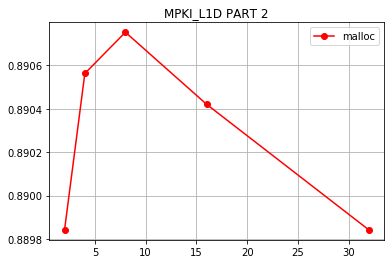

In [28]:
x=[2,4,8,16,32]
plt.title('MPKI_L1D PART 2')
plt.plot(x,fun(mc_sliced_lis,'C1_IPC'), 'r' ,marker='o',label="malloc")
#plt.plot(x,fun(bo_shared_lis,'C0_IPC'), 'b' ,marker='o',label='mmap')
plt.grid()
plt.legend(loc='best')
plt.show()

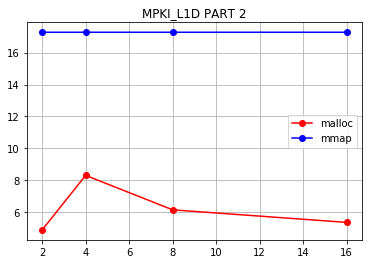

In [52]:
x=[2,4,8,16]
plt.title('MPKI_L1D PART 2')
plt.plot(x,fun(bo_sliced_lis,'C0_LLC1_MPKI'), 'r' ,marker='o',label="malloc")
plt.plot(x,fun(bo_shared_lis,'C0_LLC_MPKI'), 'b' ,marker='o',label='mmap')
plt.grid()
plt.legend(loc='best')
plt.show()

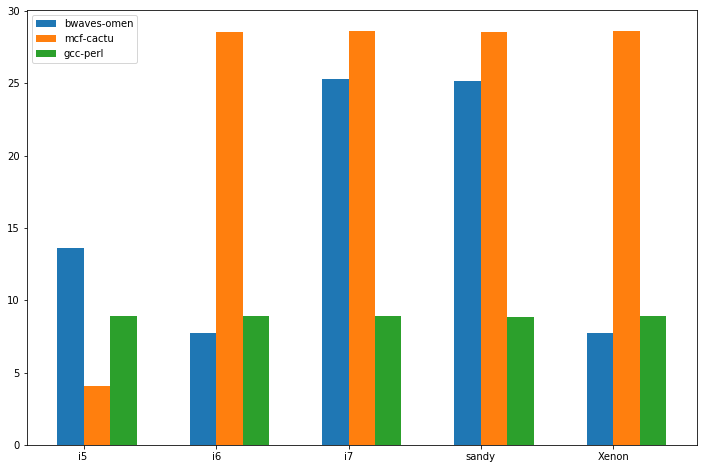

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(bo_sliced_lis,'C1_LLC1_MPKI'), width=bar_width,label='bwaves-omen' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(mc_sliced_lis,'C1_LLC1_MPKI'), width=bar_width, label='mcf-cactu')
b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C1_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

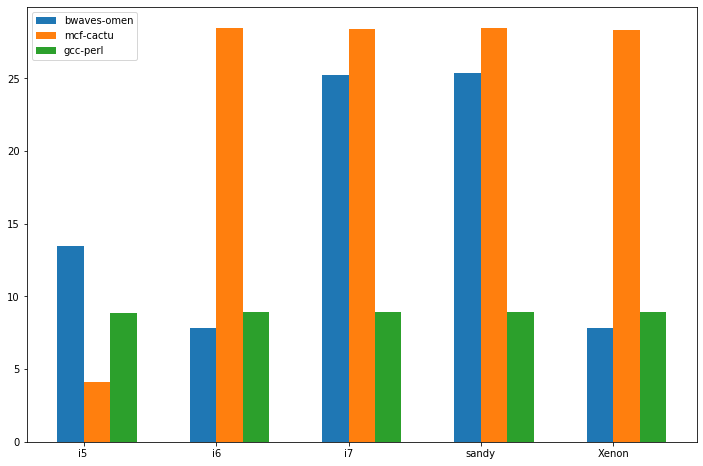

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(bo_sliced_lis,'C0_LLC1_MPKI'), width=bar_width,label='bwaves-omen' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(mc_sliced_lis,'C0_LLC1_MPKI'), width=bar_width, label='mcf-cactu')
b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C0_LLC1_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

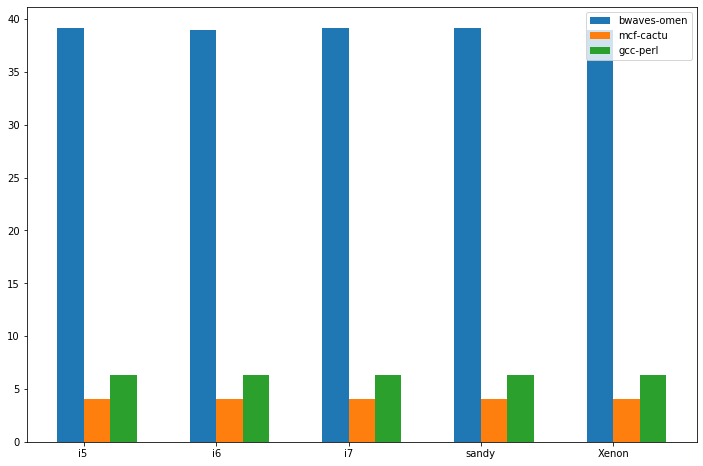

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(5)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.2

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, fun(bo_sliced_lis,'C0_MPKI'), width=bar_width,label='bwaves-omen' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(mc_sliced_lis,'C0_MPKI'), width=bar_width, label='mcf-cactu')
b3 = ax.bar(x + 2*bar_width, fun(gp_sliced_lis,'C0_MPKI'), width=bar_width, label='gcc-perl')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()

In [115]:
shared_lis[0]['C0_L2_MPKI']

17.2788

In [148]:
x ="sas_ewd".split("_")[0]

In [149]:
x

'sas'

In [34]:
def cor_fun(cpu, slic , lis):
    
    temp = [i7[0],]
    return temp

In [35]:
core4 = ['LLC0_ACCESS' , 'LLC1_ACCESS', 'LLC2_ACCESS', 'LLC3_ACCESS']
bwaves = {'INST': 0}
for i in core4:
    bwaves['C0_'+ i ] = 0
    bwaves['C1_'+ i ] = 0
    bwaves['C2_'+ i ] = 0
    bwaves['C3_'+ i ] = 0

In [36]:
bwaves

{'INST': 0,
 'C0_LLC0_ACCESS': 0,
 'C1_LLC0_ACCESS': 0,
 'C2_LLC0_ACCESS': 0,
 'C3_LLC0_ACCESS': 0,
 'C0_LLC1_ACCESS': 0,
 'C1_LLC1_ACCESS': 0,
 'C2_LLC1_ACCESS': 0,
 'C3_LLC1_ACCESS': 0,
 'C0_LLC2_ACCESS': 0,
 'C1_LLC2_ACCESS': 0,
 'C2_LLC2_ACCESS': 0,
 'C3_LLC2_ACCESS': 0,
 'C0_LLC3_ACCESS': 0,
 'C1_LLC3_ACCESS': 0,
 'C2_LLC3_ACCESS': 0,
 'C3_LLC3_ACCESS': 0}

In [37]:
i7 = [100082, 52245, 16909, 183188, 101946 , 52522 , 14244 , 183188 , 101824, 50261 , 14074 , 184109 , 102843, 51847 , 15456 , 185188]
sandy = [137939 , 69560 , 20632 , 231328 , 138699 , 69118 , 20629 , 247333 , 67352 , 34448 , 11314 , 126147 , 62946, 33797 , 9557 , 122323]
xenon =[108587 , 52825 , 14981 , 184059 , 99972 , 52061 , 12999 , 184422 , 95693 , 52075 , 17652 , 186019 , 102461 , 49866 , 15132 , 172909 ,]

In [48]:
t = 0
data_0 = [i7[t],sandy[t],xenon[t]]
data_1 =[i7[t+4],sandy[t+4], xenon[t+4]]
data_2 = [i7[t+8],sandy[t+8], xenon[t+8]]
data_3 = [i7[t+12],sandy[t+12], xenon[t+12]]

In [49]:
lis=[]
for i in range(0,3):
    temp = bwaves.copy()
    lis.append(temp)
    

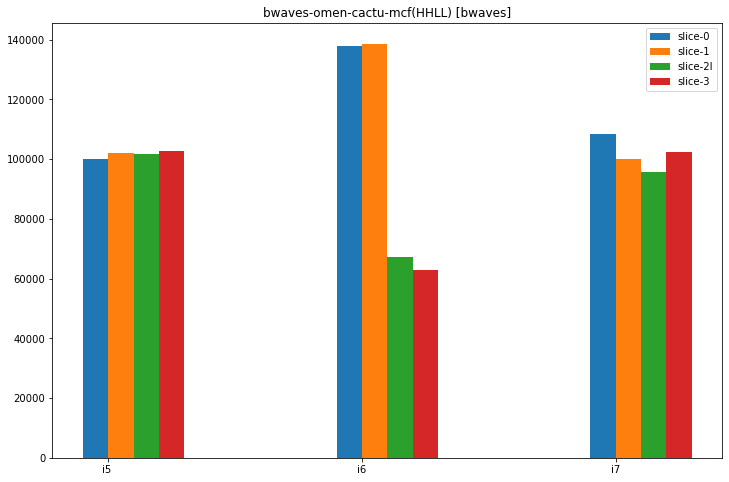

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(3)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.1
plt.title('bwaves-omen-cactu-mcf(HHLL) [bwaves]')

#temp1 = cor_fun(0,i7)
# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, data_0, width=bar_width,label='slice-0' )
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width,data_1, width=bar_width, label='slice-1')
b3 = ax.bar(x + 2*bar_width, data_2, width=bar_width, label='slice-2l')
b4 = ax.bar(x + 3*bar_width,data_3, width=bar_width, label='slice-3')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["i5 ", "i6", "i7", "sandy", "Xenon"])
# Add legend.
ax.legend()